# Final Project Submission

Please fill out:
* Student name: Monicah Iwagit Okodoi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


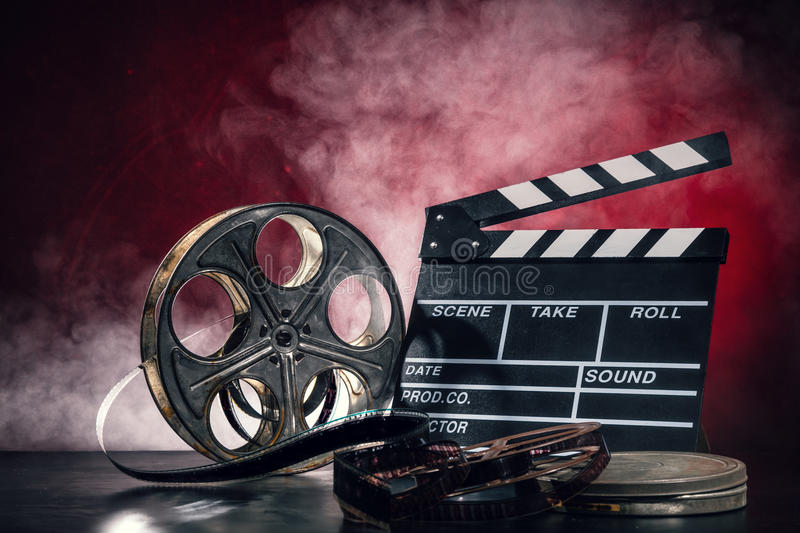

# CURRENT MOVIE ANALYSIS

# Author: Monicah Iwagit Okodoi

# Overview

Microsoft as a company wants to start on creating original video content but do not have enough knowledge about movie creation to move forward with their plan.
Using data obtained from the Box Office for analysis, it helped in discovering patterns and relationships in the data in order to make better decisions and recommendations that Microsoft will use in order for them to venture into movie crteation.

# DATA UNDERSTANDING

Data that is used for this task was obtained from movie websites. I chose to work with 3 data sets that is the Box Office Mojo data, Rotten Tomatoes and IMDB data.
After importing the necessary libraries to be used, we then read the data and understand its structrute,data contained and  cleaning it before we go ahead to analyzing them to give us efficient information about movies before making conclusions.

# Box Office Mojo Data

In [346]:
#importing the necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3


from scipy import stats
from scipy.stats import norm

In [410]:
#reading the box office mojo data from the  csv file
#checking the first 5 elements of the dataframe

mojo_df = pd.read_csv("zippedData/bom.movie_gross.csv")
mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [412]:
#column names of the dataframe

mojo_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [413]:
mojo_df.shape

(3387, 5)

In [414]:
#data types per column

mojo_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [415]:
#total number of NaN values in the dataset

mojo_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [416]:
#the summary of the mojo dataframe

mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [417]:
# top studios

top10 = mojo_df['studio'].value_counts().head(10)
top10

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

In [418]:
type(top10)

pandas.core.series.Series

In [419]:
mojo_df.groupby(['studio']).sum()

,domestic_gross,year
studio,,
3D,6100000.0,2010
A23,164200.0,4024
A24,324194200.0,98754
ADC,248200.0,4032
AF,2142900.0,12080
...,...,...
XL,458000.0,4027
YFG,1100000.0,2016
Yash,31631400.0,28194


In [46]:
#summary statistics for each column 

mojo_df['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [47]:
#understanding the years we'll be working with
mojo_df.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

# Rotten Tomatoes Data

In [48]:
#reading ROTTEN TOMATOES data from the tsv file

rtmovie_df = pd.read_csv("zippedData/rt.movie_info.tsv", sep='\t', header=0)
rtmovie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [49]:
#dropping unwanted columns
rtmovie_df = rtmovie_df.drop(rtmovie_df.columns[0], axis='columns')

In [50]:
rtmovie_df.shape

(1560, 11)

In [51]:
#previewing the columns in the dataframe

rtmovie_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [52]:
#obtaining the summary of rotten tomatoes dataframe

rtmovie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 134.2+ KB


In [53]:
# Checking for null values

rtmovie_df.isnull().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [54]:
# getting counts for each value in genre column#

rtmovie_df['genre'].value_counts()

Drama                                                              151
Comedy                                                             110
Comedy|Drama                                                        80
Drama|Mystery and Suspense                                          67
Art House and International|Drama                                   62
                                                                  ... 
Art House and International|Documentary|Drama                        1
Classics|Drama|Faith and Spirituality                                1
Comedy|Documentary|Musical and Performing Arts|Special Interest      1
Art House and International|Documentary|Drama|Special Interest       1
Comedy|Horror|Mystery and Suspense                                   1
Name: genre, Length: 299, dtype: int64

In [55]:
# descriptive statistics for the genre column to determine the top genre
rtmovie_df['genre'].describe()

count      1552
unique      299
top       Drama
freq        151
Name: genre, dtype: object

# IMDB Data

In [56]:
#connect to SQLite IMDB database using the Python sqlite3 library

import sqlite3
conn = sqlite3.connect("zippedData\im.db")


In [57]:
#viewing the list of tables


df = pd.read_sql("""SELECT name FROM sqlite_master WHERE TYPE='table';""",conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


# a) movie_basics

In [58]:
#information about the movie_basics records from IMDB


basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [314]:
basics_df.duplicated().value_counts()

False    146144
dtype: int64

In [315]:
basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [59]:
#count per genre 

genre_count = pd.read_sql("""SELECT genres,
                        COUNT(*) AS genres_count
                        FROM movie_basics
                        GROUP BY genres
                        ORDER BY genres_count DESC
                        LIMIT 20;""", conn)
genre_count

,genres,genres_count
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,None,5408
4,Horror,4372
5,"Comedy,Drama",3519
6,Thriller,3046
7,Action,2219
8,"Biography,Documentary",2115
9,"Drama,Romance",2079


# b) movie ratings

In [60]:
#information about the movie_ratings records from IMDB


ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
ratings_df.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [61]:
#viewing columns in the dataframe
ratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [316]:
ratings_df.duplicated().value_counts()

False    73856
dtype: int64

In [62]:
#the data has no nan values

ratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

# C) persons

In [302]:
#information about persons records from IMDB


persons_df = pd.read_sql("""SELECT * FROM persons;""", conn)
persons_df.head(10)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous"
6,nm0063198,Bayou,NaN,NaN,actor
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous"


In [303]:
persons_df['primary_profession'].unique()

array(['miscellaneous,production_manager,producer',
       'composer,music_department,sound_department',
       'miscellaneous,actor,writer', ...,
       'music_department,sound_department,actress',
       'director,costume_department,costume_designer',
       'actress,art_director,music_department'], dtype=object)

In [304]:
persons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [305]:
persons_df.isna().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

# Data Preparation

After choosing the preferable data sets to use, i did data preparation that involves data cleaning to prepare the data for analysIS.


During data cleaning we are going to do the following:
1. Check for and dropping irrelevant columns.
2. Standardization; Change upper case values to lower case values, rename columns and data type conversion were necessary.
3. Check for null values and dropping them.
4. Check for missing values and act on them accordingly. 
5. Check for duplicate values and dropping them. 

For the BOM Data:

In [63]:
#dropping columns in the dataframe that won't be needed during analysis

mojo_df.drop(['title'], axis=1, inplace=True)

In [436]:
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [313]:
# to check if there are any duplication
mojo_df.duplicated().value_counts()

False    3376
True       11
dtype: int64

In [432]:
#Checking for missing values 
row_count = mojo_df.shape[0]
missing_count = row_count - mojo_df.count() 
missing_count

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [66]:
# Checking for duplicates
duplicateRows = mojo_df[mojo_df.duplicated()]
duplicateRows.count()

studio            11
domestic_gross    11
foreign_gross      0
year              11
dtype: int64

In [67]:
# There are no null values

mojo_df.isnull().any()

studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [68]:
#checking for duplicates
# the data has no duplicates

mojo_df.duplicated().sum()

11

For Rotten Tomatoes Data:

I started by removing columns that i will not need in the analysis

In [69]:
rtmovie_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [70]:
rtmovie_df

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [71]:
#total values of NaN values in the data set
rtmovie_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [72]:
#Checking for missing values 
row_count = rtmovie_df.shape[0]
missing_count = row_count - rtmovie_df.count() 
missing_count

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

# Performing Data Analysis

# mojo_df

Analyzing each top 10 studios against their domestic gross

In [423]:
#sorting the data for top to studios


mojo_dfagg = mojo_df.groupby(['studio']).agg('sum')

In [429]:
mojo_dfagg = mojo_dfagg.sort_values('domestic_gross', ascending=False).head(10)
mojo_dfagg

,domestic_gross,year
studio,,
BV,1.841903e+10,213451
Uni.,1.290239e+10,296082
WB,1.216805e+10,281941
Fox,1.094950e+10,273882
Sony,8.459683e+09,221575
Par.,7.685871e+09,203417
LGF,4.118963e+09,207437
WB (NL),3.995700e+09,90644
LG/S,2.078200e+09,82599


In [427]:
mojo_dfagg.index

Index(['BV', 'Uni.', 'WB', 'Fox', 'Sony', 'Par.', 'LGF', 'WB (NL)', 'LG/S',
       'P/DW'],
      dtype='object', name='studio')

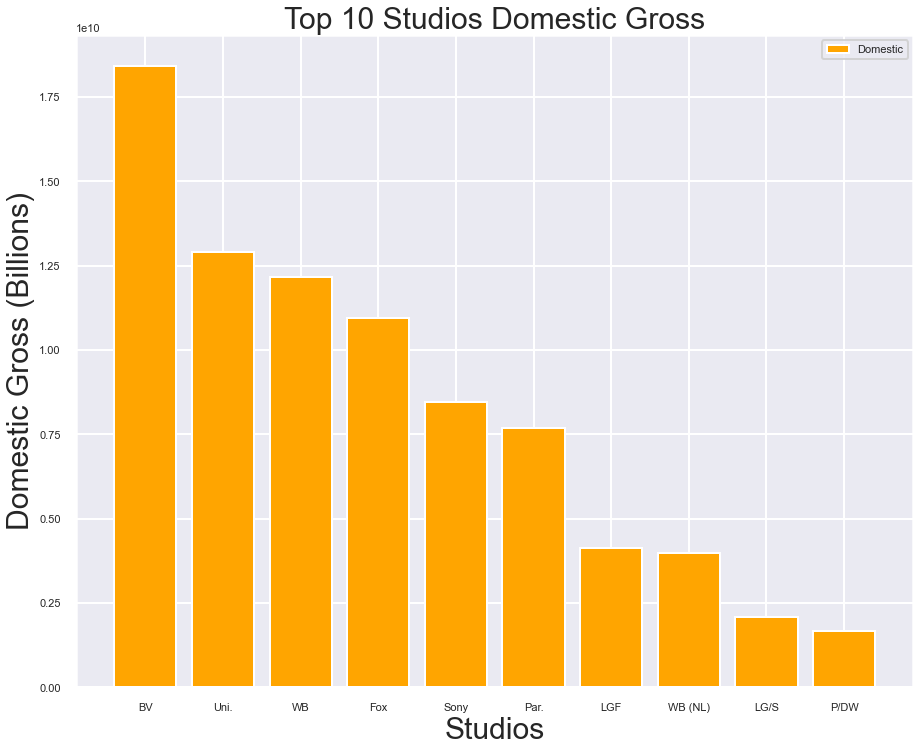

In [431]:
#bar graph plot for top 10 studios domestic gross


plt.figure(figsize=(15,12))

studios = mojo_dfagg.index
dom_gross = mojo_dfagg.domestic_gross


plt.bar(range(len(studios)), dom_gross, color='orange')

plt.title('Top 10 Studios Domestic Gross', fontsize=30)
plt.xlabel('Studios', fontsize=30)
plt.ylabel('Domestic Gross (Billions)', fontsize=30)
plt.xticks(range(len(studios)), studios)

plt.legend(['Domestic'])
plt.show();

which genre of movie is produced more?

In [73]:
#according to rtmovie_df

rtmovie_df.genre.value_counts()

Drama                                                              151
Comedy                                                             110
Comedy|Drama                                                        80
Drama|Mystery and Suspense                                          67
Art House and International|Drama                                   62
                                                                  ... 
Art House and International|Documentary|Drama                        1
Classics|Drama|Faith and Spirituality                                1
Comedy|Documentary|Musical and Performing Arts|Special Interest      1
Art House and International|Documentary|Drama|Special Interest       1
Comedy|Horror|Mystery and Suspense                                   1
Name: genre, Length: 299, dtype: int64

C:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Genres')

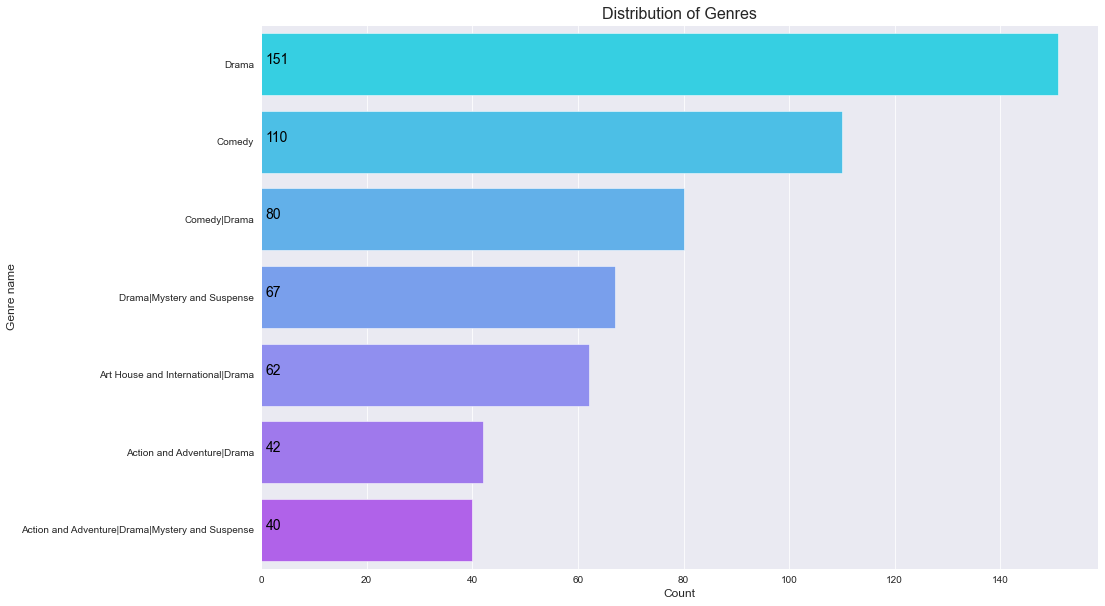

In [161]:
#Frequency of movie genres

rtmovie_df['first_genre'] = rtmovie_df['genre'].str.split(',').str[0]

a = plt.cm.cool

plt.figure(figsize=(15,10))
count = rtmovie_df['first_genre'].value_counts()[:7]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre name', fontsize=12)
plt.title("Distribution of Genres", fontsize=16)

By checking the total number movies per genre we see that Drama movies are produced more followed by comedy and the least produced being a combination of Art House and International|Classics|Comedy|Drama 

In [75]:
#viewing all the unique ratings in the dataframe

rtmovie_df['rating'].unique()

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [76]:
#checking on the total number of counts per genre:

rtmovie_df['rating'].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

<AxesSubplot:>

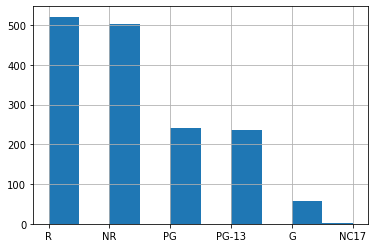

In [77]:
#visualizing this on a histogram, we'll have

rtmovie_df['rating'].hist(bins=10)

checking the total number of movies per rating, we can see that rated movies R are being produced more and the least produced are movies with NC17 rating.

In [326]:
# convert release date column to datetime values
rtmovie_df['dvd_date'] = pd.to_datetime(rtmovie_df['dvd_date'])
# create release month column
rtmovie_df['release_month'] = rtmovie_df['dvd_date'].dt.strftime('%B')

In [79]:
# checking for successful column creation
rtmovie_df['release_month'].value_counts()

March        128
May          117
October      110
February     107
September    107
November     102
June          99
August        98
April         93
July          81
January       81
December      78
Name: release_month, dtype: int64

<AxesSubplot:>

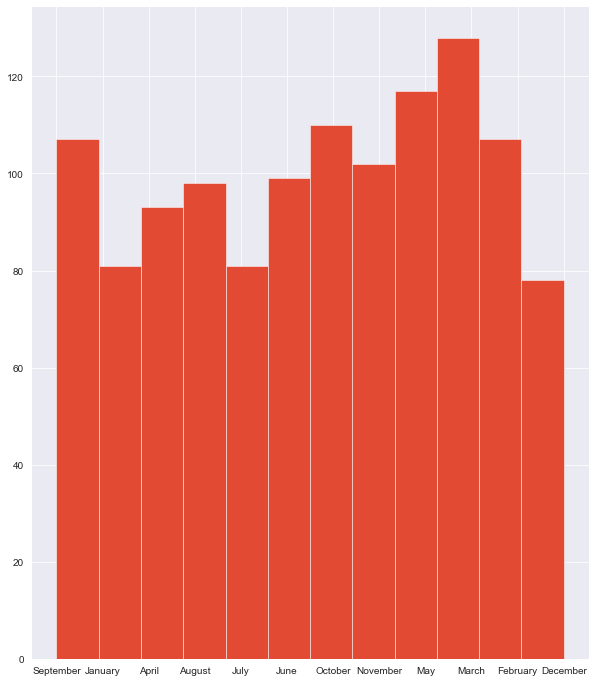

In [337]:
#visualizing this on a histogram, we'll have

rtmovie_df['release_month'].hist(bins=12, figsize=(10,12))

In [80]:
rtmovie_df

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_month
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,September
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",2013-01-01,$,"600,000",108 minutes,Entertainment One,January
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",2000-04-18,NaN,NaN,116 minutes,NaN,April
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,August
4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaT,NaN,NaN,200 minutes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006",2007-01-02,$,"33,886,034",106 minutes,New Line Cinema,January
1556,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993",2001-04-17,NaN,NaN,88 minutes,Paramount Vantage,April
1557,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962",2004-05-11,NaN,NaN,111 minutes,NaN,May
1558,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993",2002-01-29,NaN,NaN,101 minutes,NaN,January


Putting it all together:

In [81]:
# show all column names
rtmovie_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio',
       'release_month'],
      dtype='object')

# merging rotten tomatoes data and BOM data:

In [210]:
# merging the DataFrames
merged_df = pd.merge(rtmovie_df, mojo_df, how='outer')
# previewing the new DataFrame
merged_df.shape

(9213, 16)

In [211]:
merged_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_month,first_genre,domestic_gross,foreign_gross,year
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,September,Action and Adventure|Classics|Drama,96900.0,3300000,2010.0
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,September,Action and Adventure|Classics|Drama,70600.0,3300000,2011.0
2,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,September,Action and Adventure|Classics|Drama,NaN,4000000,2012.0
3,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,September,Action and Adventure|Classics|Drama,7100.0,NaN,2014.0
4,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",2001-09-25,NaN,NaN,104 minutes,NaN,September,Action and Adventure|Classics|Drama,NaN,122000000,2017.0


In [168]:
# show number of rows and columns
merged_df.shape

(9213, 16)

In [85]:
# show all column names
merged_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio',
       'release_month', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [232]:
 #counts per genre of the merged dataframe

count = merged_df['genre'].value_counts()
count


Drama|Mystery and Suspense                                                         531
Drama                                                                              489
Comedy|Drama                                                                       421
Comedy                                                                             338
Art House and International|Drama                                                  274
                                                                                  ... 
Action and Adventure|Comedy|Kids and Family|Science Fiction and Fantasy|Romance      1
Animation|Comedy                                                                     1
Action and Adventure|Horror|Kids and Family|Science Fiction and Fantasy              1
Art House and International|Drama|Horror|Mystery and Suspense                        1
Comedy|Mystery and Suspense|Romance                                                  1
Name: genre, Length: 299, dtype: int64

In [234]:
pop_genres = count.iloc[:20]
pop_genres

Drama|Mystery and Suspense                                531
Drama                                                     489
Comedy|Drama                                              421
Comedy                                                    338
Art House and International|Drama                         274
Action and Adventure|Drama                                152
Action and Adventure|Drama|Mystery and Suspense           152
Drama|Romance                                             133
Art House and International|Comedy|Drama                  131
Horror                                                    123
Comedy|Romance                                            104
Classics|Drama                                             97
Action and Adventure                                       91
Classics|Drama|Mystery and Suspense                        90
Comedy|Drama|Romance                                       71
Action and Adventure|Science Fiction and Fantasy           68
Action a

<AxesSubplot:title={'center':'Top Popular Genres'}>

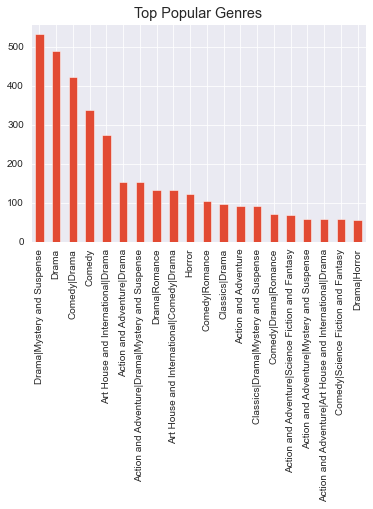

In [236]:
#top 20 popular movies that is with the most value counts represented in a graph:

pop_genres.plot.bar(x = 'genres', title = 'Top Popular Genres')

In [192]:
# getting mean and median world domestic amounts by genre

genre_stats = merged_df.groupby('genre')['domestic_gross'].agg(['median', 'mean'])
genre_stats.sort_values(by='mean', ascending=False)

,median,mean
genre,,
Drama|Mystery and Suspense,30350000.0,5.553751e+07
Art House and International|Comedy|Drama|Musical and Performing Arts,17048450.0,3.336243e+07
Drama|Horror|Mystery and Suspense,70600.0,8.384258e+06
Action and Adventure|Mystery and Suspense,70600.0,6.719047e+06
Drama|Horror,1500000.0,6.237862e+06
...,...,...
Horror|Kids and Family|Mystery and Suspense|Science Fiction and Fantasy,NaN,NaN
Horror|Musical and Performing Arts|Science Fiction and Fantasy,NaN,NaN
Horror|Mystery and Suspense|Science Fiction and Fantasy,NaN,NaN


In [228]:
#filtering the dataframe based on Drama|Mystery and Suspense which is the top genre

DramaMS=merged_df.loc[merged_df['genre'] == "Drama|Mystery and Suspense"]
DramaMS

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_month,first_genre,domestic_gross,foreign_gross,year
10,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,August,Drama|Mystery and Suspense,96900.0,3300000,2010.0
11,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,August,Drama|Mystery and Suspense,70600.0,3300000,2011.0
12,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,August,Drama|Mystery and Suspense,NaN,4000000,2012.0
13,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,August,Drama|Mystery and Suspense,7100.0,NaN,2014.0
14,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",1997-08-27,NaN,NaN,128 minutes,NaN,August,Drama|Mystery and Suspense,NaN,122000000,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003",2004-06-08,$,"88,800,000",137 minutes,WB,June,Drama|Mystery and Suspense,3200000.0,NaN,2018.0
6002,Abel Ferrara's cult crime drama Bad Lieutenant...,R,Drama|Mystery and Suspense,Werner Herzog,NaN,"Nov 20, 2009",2010-04-06,$,"1,616,556",121 minutes,First Look Pictures,April,Drama|Mystery and Suspense,NaN,NaN,NaN
6212,"Filmed in the California desert on Super 16mm,...",NR,Drama|Mystery and Suspense,Oren Shai,Oren Shai|Webb Wilcoxen,"Oct 28, 2016",2016-12-06,NaN,NaN,88 minutes,Rocking Films,December,Drama|Mystery and Suspense,NaN,NaN,NaN
6285,Frankie is a Los Angeles drug dealer. He comes...,R,Drama|Mystery and Suspense,Nick Cassavetes,Nick Cassavetes,"Jan 12, 2007",2007-05-01,$,"15,133,185",118 minutes,Universal Studios,May,Drama|Mystery and Suspense,NaN,NaN,NaN


In [229]:
#filtering out the most common director in the Drama|Mystery and Suspense genre

DramaMS['director'].value_counts()

Clint Eastwood                   141
Gary Wheeler                     136
Joseph Ruben                      10
Mike Figgis                        6
Gary Fleder                        6
Boaz Yakin                         5
Sidney Gilliat                     5
Andrew Birkin                      5
Curtis Hanson                      5
Neil Jordan                        5
Andrew Chapman                     5
Sam Peckinpah                      5
Yves Simoneau                      5
Lewis Gilbert                      5
Michael Fields                     5
Michael Apted                      5
Fritz Lang                         5
Robert Foster                      5
Gordon Hessler                     5
Gordon Willis                      5
Steven Hilliard Stern              5
Bob Rafelson|George Bud Davis      5
Andy Wolk                          5
Paul Wendkos                       5
Nicolas Roeg                       5
Larry Elikann                      5
Uli Edel                           5
J

From above Clint Eastwood was the most common director for Drama|Mystery and Suspense genre.

In [230]:
DramaMS['release_month'].value_counts()

June         152
February      31
March         30
September     20
August        16
May           15
December      12
November      12
April         12
October        5
July           5
January        5
Name: release_month, dtype: int64

<AxesSubplot:>

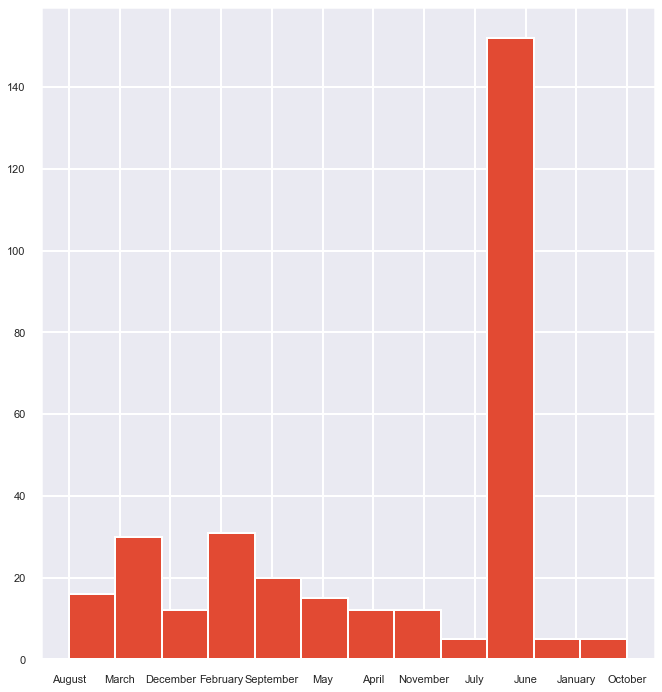

In [389]:
# Visualizing MONTH RELEASED using histogram


DramaMS['release_month'].hist(bins=12, figsize=(11,12))

Most Drama|Mystery and Suspense  movies were released in the month of june

In [231]:
DramaMS['rating'].value_counts()

R        293
PG-13    152
NR        76
PG         5
G          5
Name: rating, dtype: int64

Most Drama|Mystery and Suspense movies have a rating of R

# For IMDB data:

# i joined movie_basics, movie_ratings and directors


In [272]:
#joining movie_basics and movie_ratings using movie_id
imdb_df = pd.read_sql("""SELECT *
                        FROM movie_ratings
                        JOIN movie_basics
                           USING(movie_id)
                        JOIN directors
                           USING(movie_id)
                        JOIN persons
                           ON directors.person_id = persons.person_id 
                        ;""", conn)

imdb_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
1,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,nm9250842,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,nm9932562,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181382,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181383,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama",nm1272773,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary,nm0001206,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


In [275]:
#value counts based on genre

imdb_df['genres'].value_counts()

Drama                         25002
Documentary                   18077
Horror                        13006
Comedy                        12723
Comedy,Drama                   5903
                              ...  
Fantasy,Music,Romance             1
Biography,Fantasy,Horror          1
Biography,History,Music           1
Family,War                        1
Comedy,Documentary,Fantasy        1
Name: genres, Length: 921, dtype: int64

In [276]:
genres_count = imdb_df['genres'].value_counts().rename_axis('genres').reset_index(name = 'counts per genre')
common_genres = genres_count.iloc[:20]
common_genres

,genres,counts per genre
0,Drama,25002
1,Documentary,18077
2,Horror,13006
3,Comedy,12723
4,"Comedy,Drama",5903
5,"Comedy,Horror,Sci-Fi",4059
6,"Comedy,Horror",3814
7,"Comedy,Drama,Romance",3360
8,"Drama,Romance",3117
9,"Comedy,Drama,Music",2726


<AxesSubplot:title={'center':'Top Genres'}, xlabel='genres'>

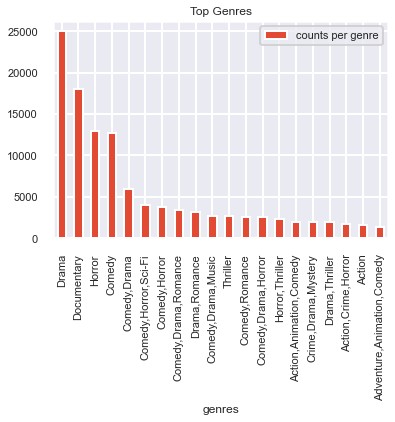

In [401]:
#top 20 movie genres with the most value counts represented graphically.

common_genres.plot.bar(x = 'genres', title = 'Top Genres')

In [278]:
#drama being the most common genre i filtered the dataframe with the drama genre

Drama=imdb_df.loc[imdb_df['genres'] == "Drama"]
Drama

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,person_id,person_id,primary_name,birth_year,death_year,primary_profession
4,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
87,tt1325019,7.2,29,The Custom Mary,The Custom Mary,2011,81.0,Drama,nm2761772,nm2761772,Matt Dunnerstick,NaN,NaN,"director,actor,writer"
108,tt1368858,5.4,4302,The Forger,The Forger,2012,94.0,Drama,nm2940732,nm2940732,Lawrence Roeck,NaN,NaN,"director,writer,producer"
109,tt1368858,5.4,4302,The Forger,The Forger,2012,94.0,Drama,nm2940732,nm2940732,Lawrence Roeck,NaN,NaN,"director,writer,producer"
115,tt1379736,5.7,15,Cesado,Cesado,2011,90.0,Drama,nm1509706,nm1509706,Daniela Schneider,NaN,NaN,"art_director,costume_designer,production_designer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181361,tt9642950,6.0,22,Darkhoongah,Darkhoongah,2019,NaN,Drama,nm5236091,nm5236091,Siavash As'adi,NaN,NaN,"writer,director"
181362,tt9643092,6.3,12,Gold Carrier,Gold Carrier,2019,NaN,Drama,nm1180701,nm1180701,Turaj Aslani,NaN,NaN,"cinematographer,writer,producer"
181363,tt9643092,6.3,12,Gold Carrier,Gold Carrier,2019,NaN,Drama,nm1180701,nm1180701,Turaj Aslani,NaN,NaN,"cinematographer,writer,producer"
181371,tt9690762,5.6,37,On the Balcony,Yang tai shang,2019,100.0,Drama,nm4070848,nm4070848,Meng Zhang,NaN,NaN,"director,producer,writer"


In [440]:
#analyzing directors primary_name with the number of drama movies they are involved in, we'll have:

director = Drama['primary_name'].value_counts().head(10)
director

Xavier Agudo           26
Prashant Sehgal        24
Neha Raheja Thakker    24
Mairtín de Barra       24
Ko-shang Shen          24
Adam Ruszkowski        24
Yango Gonzalez         24
Varun Mathur           24
Fahad Shaikh           24
Marty Shea             24
Name: primary_name, dtype: int64

In [438]:
#checking on which month did modt and least drama genres released

Drama['runtime_minutes'].value_counts().head(10)

90.0     1326
94.0     1136
100.0     836
105.0     674
99.0      634
93.0      618
95.0      576
85.0      565
96.0      545
98.0      530
Name: runtime_minutes, dtype: int64

In [446]:
#filtering out the average rating in the Drama genre

Drama['averagerating'].value_counts().head(10)

6.7    1544
6.4    1109
6.0    1106
6.2    1076
6.6    1043
7.0     942
7.2     896
6.1     869
6.5     863
5.6     847
Name: averagerating, dtype: int64

<AxesSubplot:ylabel='Frequency'>

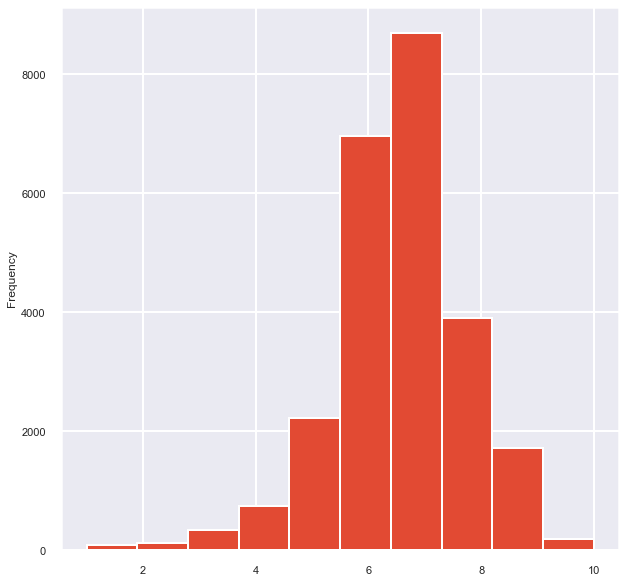

In [397]:
plt.figure(figsize=(10,10))

Drama['averagerating'].plot.hist()